In [15]:
import pandas as pd
import numpy as np
from numpy import array

import matplotlib.pyplot as plt

import re

In [60]:
# INPUTS:

data_folder_path = "/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/predictions/"

training_data_name = "tiling"

data_name = "yeast_chrV_1bpresolution_subsequence50" # csv

data_file_type = ".csv"

sequence_column_name = "sequence"

In [61]:
cn_avg_pred_df = pd.read_csv(f"/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/ir_lstm_cn_{training_data_name}_{data_name}_predictions.csv")

In [62]:
genome_df_chrV = pd.read_csv(f"{data_folder_path}ir_lstm_smoothC0_10_11_contracted_{training_data_name}_ir_lstm_cn_{training_data_name}_{data_name}_smoothC0_10_11_best_fold_predictions.csv")


In [63]:
normal_mean = -0.011196041799376931
normal_std = 0.651684644408004

In [64]:
genome_df_chrV["smoothC0_predictions_unnorm"] = genome_df_chrV["smoothC0_predictions"]*normal_std + normal_mean

In [65]:
genome_df_chrV = pd.concat([genome_df_chrV, cn_avg_pred_df], axis=1)

In [66]:
genome_df_chrV.columns

Index(['sequence', 'chrID', 'position', 'smooth_C26', 'smooth_C29',
       'smooth_C31', 'smooth_C26_rev_comp', 'smooth_C29_rev_comp',
       'smooth_C31_rev_comp', 'smoothC0', 'smoothC0_predictions',
       'smoothC0_predictions_unnorm', 'n=26', 'n=29', 'n=31', 'n=26_reverse',
       'n=29_reverse', 'n=31_reverse', 'n=26_comp', 'n=29_comp', 'n=31_comp',
       'n=26_rev_comp', 'n=29_rev_comp', 'n=31_rev_comp', 'C0'],
      dtype='object')

In [67]:
genome_df_chrV_temp = pd.read_csv(f"/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/chrV_ir_lstm_cn_{training_data_name}_post_smoothed_matched.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/chrV_ir_lstm_cn_tiling_post_smoothed_matched.csv'

In [68]:
genome_df_chrV_temp

NameError: name 'genome_df_chrV_temp' is not defined

In [69]:
genome_df_chrV["C26_raw"] = genome_df_chrV_temp["C26_raw"]
genome_df_chrV["C29_raw"] = genome_df_chrV_temp["C29_raw"]
genome_df_chrV["C31_raw"] = genome_df_chrV_temp["C31_raw"]

NameError: name 'genome_df_chrV_temp' is not defined

In [70]:
del genome_df_chrV_temp

NameError: name 'genome_df_chrV_temp' is not defined

In [71]:
genome_df_chrV["C26_raw_norm"] = (genome_df_chrV["C26_raw"] - genome_df_chrV["C26_raw"].mean())/genome_df_chrV["C26_raw"].std()*genome_df_chrV["n=26"].std()
genome_df_chrV["C29_raw_norm"] = (genome_df_chrV["C29_raw"] - genome_df_chrV["C29_raw"].mean())/genome_df_chrV["C29_raw"].std()*genome_df_chrV["n=29"].std()
genome_df_chrV["C31_raw_norm"] = (genome_df_chrV["C31_raw"] - genome_df_chrV["C31_raw"].mean())/genome_df_chrV["C31_raw"].std()*genome_df_chrV["n=31"].std()

KeyError: 'C26_raw'

In [72]:
print(genome_df_chrV["C26_raw"].mean(), genome_df_chrV["C29_raw"].mean(), genome_df_chrV["C31_raw"].mean())
print(genome_df_chrV["C26_raw"].std(), genome_df_chrV["C29_raw"].std(), genome_df_chrV["C31_raw"].std())

print(genome_df_chrV["n=26"].mean(), genome_df_chrV["n=29"].mean(), genome_df_chrV["n=31"].mean())
print(genome_df_chrV["n=26"].std(), genome_df_chrV["n=29"].std(), genome_df_chrV["n=31"].std())

KeyError: 'C26_raw'

In [73]:
meanC26 = -0.1702373294847514 
stdC26 = 0.5761561889426974
meanC29 = -0.1730189136679293 
stdC29 = 0.5889335849536195
meanC31 = -0.20523567238490675 
stdC31 = 0.6526103123263609

In [74]:
cn_avg_pred_df

,n=26,n=29,n=31,n=26_reverse,n=29_reverse,n=31_reverse,n=26_comp,n=29_comp,n=31_comp,n=26_rev_comp,n=29_rev_comp,n=31_rev_comp,C0
0,-0.453347,-0.627388,-0.396521,2.035031,1.047136,-0.469321,1.863749,1.648355,0.800228,-0.525005,-0.368169,-0.418247,-0.416519
1,-0.279821,-0.653612,-0.502821,2.220499,0.240150,0.077993,1.554749,2.095215,1.762567,-0.555140,-0.284141,-0.262650,-0.355435
2,-0.342606,-0.448339,-0.476831,2.019326,-0.313433,0.935878,1.260944,2.226643,2.123617,-0.514449,-0.382669,-0.338941,-0.395895
3,-0.399345,-0.442532,-0.399097,1.636463,-0.242350,1.518844,0.451818,2.176857,2.198343,-0.553157,-0.471041,-0.345032,-0.396418
4,-0.576827,-0.525379,-0.325661,0.915955,0.587437,1.876456,0.118319,1.838895,2.114885,-0.742663,-0.157121,0.043354,-0.467565
...,...,...,...,...,...,...,...,...,...,...,...,...,...
576820,1.860281,1.425676,0.033508,-1.020843,-1.509358,-1.959355,-1.372557,-0.701077,-1.094367,2.072896,1.507879,0.331652,1.069545
576821,1.728922,1.660969,1.013292,-1.464343,-1.708619,-1.954342,-1.618316,-1.146228,-1.331187,2.071106,0.975800,-0.319321,1.412484
576822,0.691388,1.564713,1.412105,-1.717937,-1.655562,-1.890883,-1.757556,-1.490416,-1.578371,1.588807,-0.089022,-0.478377,0.957592
576823,0.067896,1.451819,1.525671,-1.803639,-1.486870,-1.511242,-1.684635,-1.735190,-1.765663,0.918664,-0.923980,-0.117385,0.631284


In [91]:
#FIXME Added for graphical abstract (Delete later)
genome_df_chrV["C26"] = cn_avg_pred_df["n=26"]
genome_df_chrV["C29"] = cn_avg_pred_df["n=29"]
genome_df_chrV["C31"] = cn_avg_pred_df["n=31"]

In [31]:
genome_df_chrV["C26"] = (cn_avg_pred_df["n=26"].values*stdC26) + meanC26
genome_df_chrV["C29"] = (cn_avg_pred_df["n=29"].values*stdC29) + meanC29
genome_df_chrV["C31"] = (cn_avg_pred_df["n=31"].values*stdC31) + meanC31


In [75]:
### DNAcycP:
# DNAcycP_pred_chrV = pd.read_csv("/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/predictions/chrv_1bp_cycle_norm_DNAcycP.txt", header=None)
# DNAcycP_pred_chrV = pd.read_csv("/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/predictions/chrV_1bpres_DNAcycP_cycle_norm.txt", header=None)
DNAcycP_pred_chrV = pd.read_csv("/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/predictions/chrV_1bpres_DNAcycP_cycle_unnorm.txt", header=None)
DNAcycP_pred_chrV = array(DNAcycP_pred_chrV)
genome_df_chrV["DNAcycP_pred_chrV"] = DNAcycP_pred_chrV

In [76]:
### CycPred:
CycPred_pred_chrV = pd.read_csv("/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/predictions/cycpred_chrv_1bp.txt", header=None)
# CycPred_pred_chrV_mean = CycPred_pred_chrV.mean()
# CycPred_pred_chrV_std = CycPred_pred_chrV.std()
# CycPred_pred_chrV = (CycPred_pred_chrV-CycPred_pred_chrV_mean)/CycPred_pred_chrV_std
CycPred_pred_chrV = array(CycPred_pred_chrV)
genome_df_chrV["CycPred_pred_chrV"] = CycPred_pred_chrV

In [77]:
### DeepBend:
DeepBend_pred_chrV = pd.read_csv("/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/predictions/deepbend_chrv_1bp.txt", header=None)
# DeepBend_pred_chrV_mean = DeepBend_pred_chrV.mean()
# DeepBend_pred_chrV_std = DeepBend_pred_chrV.std()
# DeepBend_pred_chrV = (DeepBend_pred_chrV-DeepBend_pred_chrV_mean)/DeepBend_pred_chrV_std
DeepBend_pred_chrV = array(DeepBend_pred_chrV)
genome_df_chrV["DeepBend_pred_chrV"] = DeepBend_pred_chrV

In [78]:
### MIXBend:
MIXBend_pred_chrV = pd.read_csv("/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/predictions/mixbend_chrv_1bp.txt")
# MIXBend_pred_chrV_mean = MIXBend_pred_chrV.mean()
# MIXBend_pred_chrV_std = MIXBend_pred_chrV.std()
# MIXBend_pred_chrV = (MIXBend_pred_chrV-MIXBend_pred_chrV_mean)/MIXBend_pred_chrV_std
MIXBend_pred_chrV = array(MIXBend_pred_chrV)
genome_df_chrV["MIXBend_pred_chrV"] = MIXBend_pred_chrV

In [79]:
genome_df_chrV.mean(numeric_only=True)

position                       288412.000000
smooth_C26                         -0.000203
smooth_C29                         -0.010987
smooth_C31                         -0.011120
smooth_C26_rev_comp                 0.000256
smooth_C29_rev_comp                -0.009917
smooth_C31_rev_comp                -0.011193
smoothC0                           -0.007194
smoothC0_predictions                0.039890
smoothC0_predictions_unnorm         0.014800
n=26                               -0.000199
n=29                               -0.010982
n=31                               -0.011115
n=26_reverse                        0.031097
n=29_reverse                        0.023302
n=31_reverse                        0.034720
n=26_comp                           0.030704
n=29_comp                           0.023764
n=31_comp                           0.034528
n=26_rev_comp                       0.000262
n=29_rev_comp                      -0.009915
n=31_rev_comp                      -0.011192
C0        

In [80]:
genome_df_chrV.std(numeric_only=True)

position                       166515.178850
smooth_C26                          0.682398
smooth_C29                          0.595258
smooth_C31                          0.629215
smooth_C26_rev_comp                 0.680727
smooth_C29_rev_comp                 0.595259
smooth_C31_rev_comp                 0.629555
smoothC0                            0.624742
smoothC0_predictions                0.939956
smoothC0_predictions_unnorm         0.612555
n=26                                0.894530
n=29                                0.905077
n=31                                0.914870
n=26_reverse                        0.865536
n=29_reverse                        0.879328
n=31_reverse                        0.887255
n=26_comp                           0.865285
n=29_comp                           0.878724
n=31_comp                           0.886794
n=26_rev_comp                       0.893233
n=29_rev_comp                       0.904660
n=31_rev_comp                       0.915054
C0        

In [81]:
alpha_val=0.3
alpha_val_3 = 0.5
sequence_length=200

In [82]:
starting_point=0

starting_point=9400 # High Value Problem Region
starting_point=16400 # High Value Problem Region
starting_point=18400 # High Value Problem Region
starting_point=43800 # High Value Problem Region
starting_point=51400 # High Value Problem Region
starting_point=56000 # High Value Problem Region
starting_point=61700 # High Value Problem Region
starting_point=65200 # High Value Problem Region
starting_point=77100 # High Value Problem Region
starting_point=88600 # High Value Problem Region
starting_point=95000 # High Value Problem Region
starting_point=112200 # High Value Problem Region
starting_point=113600 # High Value Problem Region
starting_point=121000 # High Value Problem Region

# starting_point=59200 # Mid Value Problem Region
# starting_point=86400 # Mid Value Problem Region REALLY INTERESTING - WHAT IS GOING ON HERE
# starting_point=94500 # Mid Value Problem Region
# starting_point=100500 # Mid Value Problem Region
# starting_point=102400 # Mid Value Problem-ish Region
# starting_point=116600 # Mid Value Problem Region

# starting_point=60900 # Low Value Problem-ish Region
# starting_point=115900 # Low Value Problem Region and SmoothC0 Too Low

# starting_point=70300 # SmoothC0 Too Low?
# starting_point=77700 # SmoothC0 Too Low?
# starting_point=104200 # SmoothC0 Too Low?



In [83]:
# Problem Region Type 1:

starting_point = 9455-55
starting_point = 16465-55
starting_point = 18522-52
# starting_point = 21286-56
starting_point = 43839-59



starting_point = 88695-55


starting_point = 545692-52

In [84]:
# Problem Region Type 2:

# starting_point = 22239-59
starting_point = 34923-53
# starting_point = 47929-59
starting_point = 50932-52


# starting_point = 474642-42

In [85]:
starting_point = 479158 # Region for Paper?
starting_point = 479208 # Region for Paper?

In [86]:
# genome_df_chrV["forward_rev_comp_mean"] = genome_df_chrV[["n=26", "n=29", "n=31", "n=26_rev_comp", "n=29_rev_comp", "n=31_rev_comp"]].mean(axis=1)
# genome_df_chrV["forward_rev_comp_mean"] = genome_df_chrV[["n=26", "n=29", "n=31", "n=29_rev_comp"]].mean(axis=1)
# genome_df_chrV["forward_rev_comp_mean"] = genome_df_chrV[["n=29", "n=29_rev_comp"]].mean(axis=1)

In [93]:
# alpha_val1 = 0.3
alpha_val1 = 1

In [94]:
sequence_length=100

In [95]:
genome_df_chrV.columns

Index(['sequence', 'chrID', 'position', 'smooth_C26', 'smooth_C29',
       'smooth_C31', 'smooth_C26_rev_comp', 'smooth_C29_rev_comp',
       'smooth_C31_rev_comp', 'smoothC0', 'smoothC0_predictions',
       'smoothC0_predictions_unnorm', 'n=26', 'n=29', 'n=31', 'n=26_reverse',
       'n=29_reverse', 'n=31_reverse', 'n=26_comp', 'n=29_comp', 'n=31_comp',
       'n=26_rev_comp', 'n=29_rev_comp', 'n=31_rev_comp', 'C0',
       'DNAcycP_pred_chrV', 'CycPred_pred_chrV', 'DeepBend_pred_chrV',
       'MIXBend_pred_chrV', 'C26', 'C29', 'C31'],
      dtype='object')

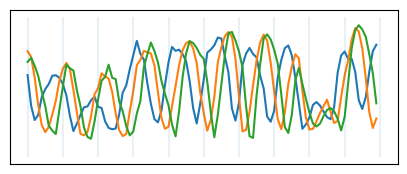

In [96]:
# starting_point = np.random.randint(genome_df_chrV.shape[0])

# ylims=[-3.5, 3.5]
ylims=[-2.1, 1.9]
# ylims=[-4, 4]

# plt.figure(figsize=(3.5,1.75))
# plt.figure(figsize=(6,4))
plt.figure(figsize=(5,2))

# plt.figure(figsize=(6,6))

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["n=26"][range(starting_point, starting_point + sequence_length)], label="Predicted C26", color="C0", alpha=alpha_val1)
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["n=29"][range(starting_point, starting_point + sequence_length)], label="Predicted C29", color="C1", alpha=alpha_val1)
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["n=31"][range(starting_point, starting_point + sequence_length)], label="Predicted C31", color="C2", alpha=alpha_val1)

plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_chrV["C26"][range(starting_point, starting_point + sequence_length)], label="Predicted C26", color="C0", alpha=alpha_val1)
plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_chrV["C29"][range(starting_point, starting_point + sequence_length)], label="Predicted C29", color="C1", alpha=alpha_val1)
plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_chrV["C31"][range(starting_point, starting_point + sequence_length)], label="Predicted C31", color="C2", alpha=alpha_val1)

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smooth_C26"][range(starting_point, starting_point + sequence_length)], label="Predicted C26", color="C0")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smooth_C29"][range(starting_point, starting_point + sequence_length)], label="Predicted C29", color="C1")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smooth_C31"][range(starting_point, starting_point + sequence_length)], label="Predicted C31", color="C2")

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["n=26_rev_comp"][range(starting_point, starting_point + sequence_length)], label="Predicted C26 (Reverse Complement)", 
#          color="C0", linestyle="dashed", alpha=alpha_val1)
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["n=29_rev_comp"][range(starting_point, starting_point + sequence_length)], label="Predicted C29 (Reverse Complement)", 
#          color="C1", linestyle="dashed", alpha=alpha_val1)
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["n=31_rev_comp"][range(starting_point, starting_point + sequence_length)], label="Predicted C31 (Reverse Complement)", 
#          color="C2", linestyle="dashed", alpha=alpha_val1)


# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smoothC0"][range(starting_point, starting_point + sequence_length)], label="SmoothC0", color="C3")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smoothC0_predictions"][range(starting_point, starting_point + sequence_length)], label="SmoothC0", color="C9")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smoothC0_predictions_unnorm"][range(starting_point, starting_point + sequence_length)], label="SmoothC0", color="C9")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["forward_rev_comp_mean"][range(starting_point, starting_point + sequence_length)], label="UnSmoothC0", alpha=alpha_val, color="C3")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["C0"][range(starting_point, starting_point + sequence_length)], label="Predicted C0", alpha=alpha_val_4)

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["DNAcycP_pred_chrV"][range(starting_point, starting_point + sequence_length)], label="DNAcycP", alpha=0.7, color="C4")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["CycPred_pred_chrV"][range(starting_point, starting_point + sequence_length)], label="CycPred", alpha=0.7, color="C5")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["DeepBend_pred_chrV"][range(starting_point, starting_point + sequence_length)], label="DeepBend", alpha=0.7, color="C6")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["MIXBend_pred_chrV"][range(starting_point, starting_point + sequence_length)], label="MIXBend", alpha=0.7, color="C7")


# plt.plot([list(range(starting_point, starting_point + sequence_length))[i] for i, x in enumerate(genome_df_chrV.C0[range(starting_point, starting_point + sequence_length)]) if x is not None],
#          [x for x in genome_df_chrV.C0[range(starting_point, starting_point + sequence_length)] if x is not None], label="Original C0", alpha=alpha_val_2, marker="o")
# plt.plot([list(range(starting_point, starting_point + sequence_length))[i] for i, x in enumerate(genome_df_chrV.C26_raw[range(starting_point, starting_point + sequence_length)]) if x is not None],
#          [x for x in genome_df_chrV.C26_raw[range(starting_point, starting_point + sequence_length)] if x is not None], label="Original C26", alpha=alpha_val_3, marker="o")
# plt.plot([list(range(starting_point, starting_point + sequence_length))[i] for i, x in enumerate(genome_df_chrV.C29_raw[range(starting_point, starting_point + sequence_length)]) if x is not None],
#          [x for x in genome_df_chrV.C29_raw[range(starting_point, starting_point + sequence_length)] if x is not None], label="Original C29", alpha=alpha_val_3, marker="o")
# plt.plot([list(range(starting_point, starting_point + sequence_length))[i] for i, x in enumerate(genome_df_chrV.C31_raw[range(starting_point, starting_point + sequence_length)]) if x is not None],
#          [x for x in genome_df_chrV.C31_raw[range(starting_point, starting_point + sequence_length)] if x is not None], label="Original C31", alpha=alpha_val_3, marker="o")

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          ((genome_df_chrV["n=26"] + genome_df_chrV["n=31"])/2)[range(starting_point, starting_point + sequence_length)], label="Predicted C26 - C31", alpha=alpha_val, color="C4")

plt.vlines(list(range(starting_point, starting_point+sequence_length+1, 10)), ylims[0], ylims[1], alpha=0.1)
# plt.title("Predictions on ChrV, No Smoothing")
# plt.legend(fontsize=7)
# plt.ylim(ylims)
# plt.locator_params(axis='x', nbins=5)
plt.xticks([])
plt.yticks([])
plt.show()
# starting_point += sequence_length


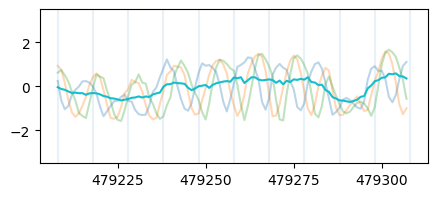

In [1267]:
# starting_point = np.random.randint(genome_df_chrV.shape[0])

ylims=[-3.5, 3.5]

# plt.figure(figsize=(3.5,1.75))
# plt.figure(figsize=(6,4))
plt.figure(figsize=(5,2))

# plt.figure(figsize=(6,6))

plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_chrV["n=26"][range(starting_point, starting_point + sequence_length)], label="Predicted C26", color="C0", alpha=alpha_val1)
plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_chrV["n=29"][range(starting_point, starting_point + sequence_length)], label="Predicted C29", color="C1", alpha=alpha_val1)
plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_chrV["n=31"][range(starting_point, starting_point + sequence_length)], label="Predicted C31", color="C2", alpha=alpha_val1)

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smoothC0"][range(starting_point, starting_point + sequence_length)], label="SmoothC0", color="C3")
plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_chrV["smoothC0_predictions_unnorm"][range(starting_point, starting_point + sequence_length)], label="SmoothC0", color="C9")

plt.vlines(list(range(starting_point, starting_point+sequence_length+1, 10)), ylims[0], ylims[1], alpha=0.1)
# plt.title("Predictions on ChrV, No Smoothing")
# plt.legend(fontsize=7)
plt.ylim(ylims)
plt.locator_params(axis='x', nbins=5)
plt.show()
# starting_point += sequence_length


In [1117]:
# starting_point -= 10

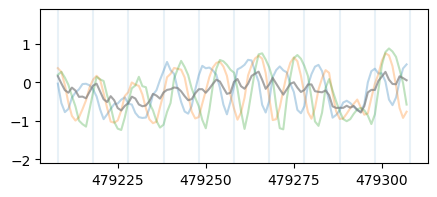

In [1273]:
# starting_point = np.random.randint(genome_df_chrV.shape[0])

# ylims=[-2, 1.5]
# ylims=[-3, 3]
ylims=[-2.1, 1.9]

# plt.figure(figsize=(3.5,1.75))
# plt.figure(figsize=(6,4))
plt.figure(figsize=(5,2))

# plt.figure(figsize=(6,6))

plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_chrV["C26"][range(starting_point, starting_point + sequence_length)], label="Predicted C26", color="C0", alpha=alpha_val1)
plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_chrV["C29"][range(starting_point, starting_point + sequence_length)], label="Predicted C29", color="C1", alpha=alpha_val1)
plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_chrV["C31"][range(starting_point, starting_point + sequence_length)], label="Predicted C31", color="C2", alpha=alpha_val1)

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["DNAcycP_pred_chrV"][range(starting_point, starting_point + sequence_length)], label="DNAcycP", alpha=0.7, color="C4")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["CycPred_pred_chrV"][range(starting_point, starting_point + sequence_length)], label="CycPred", alpha=0.7, color="C5")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["DeepBend_pred_chrV"][range(starting_point, starting_point + sequence_length)], label="DeepBend", alpha=0.7, color="C6")
plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_chrV["MIXBend_pred_chrV"][range(starting_point, starting_point + sequence_length)], label="MIXBend", alpha=0.7, color="C7")

# plt.plot([list(range(starting_point, starting_point + sequence_length))[i] for i, x in enumerate(genome_df_chrV.C26_raw[range(starting_point, starting_point + sequence_length)]) if x is not None],
#          [x for x in genome_df_chrV.C26_raw[range(starting_point, starting_point + sequence_length)] if x is not None], label="Original C26", alpha=alpha_val_3, marker="o")
# plt.plot([list(range(starting_point, starting_point + sequence_length))[i] for i, x in enumerate(genome_df_chrV.C29_raw[range(starting_point, starting_point + sequence_length)]) if x is not None],
#          [x for x in genome_df_chrV.C29_raw[range(starting_point, starting_point + sequence_length)] if x is not None], label="Original C29", alpha=alpha_val_3, marker="o")
# plt.plot([list(range(starting_point, starting_point + sequence_length))[i] for i, x in enumerate(genome_df_chrV.C31_raw[range(starting_point, starting_point + sequence_length)]) if x is not None],
#          [x for x in genome_df_chrV.C31_raw[range(starting_point, starting_point + sequence_length)] if x is not None], label="Original C31", alpha=alpha_val_3, marker="o")


plt.vlines(list(range(starting_point, starting_point+sequence_length+1, 10)), ylims[0], ylims[1], alpha=0.1)
# plt.title("Predictions on ChrV, No Smoothing")
# plt.legend(fontsize=7)
plt.ylim(ylims)
plt.locator_params(axis='x', nbins=5)
plt.show()
# starting_point += sequence_length


In [1155]:
pd.set_option('display.max_colwidth', 100)

In [1253]:
genome_df_chrV[["sequence", "smoothC0_predictions_unnorm"]].loc[range(starting_point+25, starting_point+45)]

,sequence,smoothC0_predictions_unnorm
287213,CGTTGAGTGTTAATTTTGTGGTGATTGGCTTCAGTTTTGATTGTTTCGGA,1.229842
287214,GTTGAGTGTTAATTTTGTGGTGATTGGCTTCAGTTTTGATTGTTTCGGAT,1.274469
287215,TTGAGTGTTAATTTTGTGGTGATTGGCTTCAGTTTTGATTGTTTCGGATG,1.366307
287216,TGAGTGTTAATTTTGTGGTGATTGGCTTCAGTTTTGATTGTTTCGGATGA,1.393103
287217,GAGTGTTAATTTTGTGGTGATTGGCTTCAGTTTTGATTGTTTCGGATGAA,1.376741
287218,AGTGTTAATTTTGTGGTGATTGGCTTCAGTTTTGATTGTTTCGGATGAAA,1.451913
287219,GTGTTAATTTTGTGGTGATTGGCTTCAGTTTTGATTGTTTCGGATGAAAT,1.404366
287220,TGTTAATTTTGTGGTGATTGGCTTCAGTTTTGATTGTTTCGGATGAAATG,1.258519
287221,GTTAATTTTGTGGTGATTGGCTTCAGTTTTGATTGTTTCGGATGAAATGA,1.061630
287222,TTAATTTTGTGGTGATTGGCTTCAGTTTTGATTGTTTCGGATGAAATGAA,0.983639


In [1006]:
genome_df_chrV

,sequence,chrID,position,smooth_C26,smooth_C29,smooth_C31,smooth_C26_rev_comp,smooth_C29_rev_comp,smooth_C31_rev_comp,smoothC0,...,C26_raw,C29_raw,C31_raw,C26,C29,C31,DNAcycP_pred_chrV,CycPred_pred_chrV,DeepBend_pred_chrV,MIXBend_pred_chrV
0,CGTCTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAA...,chrV,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.050020,-0.734749,0.267095,-0.431436,-0.542509,-0.464009,-0.493540,-0.407623,-0.402004,-0.382979
1,GTCTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAA...,chrV,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.331458,-0.557953,-0.533382,-0.458455,-0.428913,-0.358417,-0.354479
2,TCTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAG...,chrV,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.367632,-0.437061,-0.516420,-0.441402,-0.401395,-0.308461,-0.360557
3,CTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGC...,chrV,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.400323,-0.433641,-0.465691,-0.457449,-0.436235,-0.299341,-0.350954
4,TCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCT...,chrV,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.502580,-0.482432,-0.417765,-0.409130,-0.397686,-0.469891,-0.421557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576820,ATGTAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTT...,chrV,576820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.901575,0.666610,-0.183368,0.478271,0.514447,0.273814,0.381359
576821,TGTAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTTT...,chrV,576821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.497742,1.354887,0.907744,0.825892,0.805181,0.456049,0.526107,0.536497,0.504590,0.501371
576822,GTAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTTTT...,chrV,576822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.228110,0.748493,0.716319,0.222641,0.378218,0.584132,0.407329
576823,TAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTTTTT...,chrV,576823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.131118,0.682006,0.790433,0.119502,0.402313,0.556419,0.241944


/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/patches.py:742: RuntimeWarning: invalid value encountered in scalar add
  x1 = self.convert_xunits(self._x0 + self._width)
/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/patches.py:743: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)


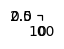

<Figure size 800x200 with 0 Axes>

In [26]:
x = np.linspace(1, 100, 1000)
y = np.log(x)
y1 = np.sin(x)
fig = plt.figure("Line plot", figsize=(0,0))
legendFig = plt.figure("Legend plot")
ax = fig.add_subplot(111)
line1, = ax.plot(x,y, color="C0", alpha=alpha_val1)
line2, = ax.plot(x,y, color="C1", alpha=alpha_val1)
line3, = ax.plot(x,y, color="C2", alpha=alpha_val1)
line4, = ax.plot(x,y, color="C9")
line5, = ax.plot(x,y, color="C4")
line6, = ax.plot(x,y, color="C5")
line7, = ax.plot(x,y, color="C6")
line8, = ax.plot(x,y, color="C7")
legendFig.legend([line1, line2, line3, line4, line5, line6, line7, line8], 
                 ["C26", "C29", "C31", "DNAcycPV2", "DNAcycP", "CycPred", "DeepBend", "MIXBend"], ncol=1)
legendFig.set_figheight(2)
legendFig.set_figwidth(8)
legendFig.savefig('legend.png')

/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/patches.py:742: RuntimeWarning: invalid value encountered in scalar add
  x1 = self.convert_xunits(self._x0 + self._width)
/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/patches.py:743: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)


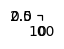

<Figure size 800x200 with 0 Axes>

In [30]:
x = np.linspace(1, 100, 1000)
y = np.log(x)
y1 = np.sin(x)
fig = plt.figure("Line plot", figsize=(0,0))
legendFig = plt.figure("Legend plot")
ax = fig.add_subplot(111)
line2, = ax.plot(x,y, color="C4")
legendFig.legend([line2], 
                 ["DNAcycP"], ncol=1)
legendFig.set_figheight(2)
legendFig.set_figwidth(8)
legendFig.savefig('legend.png')

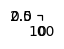

<Figure size 800x200 with 0 Axes>

In [31]:
x = np.linspace(1, 100, 1000)
y = np.log(x)
y1 = np.sin(x)
fig = plt.figure("Line plot", figsize=(0,0))
legendFig = plt.figure("Legend plot")
ax = fig.add_subplot(111)
line3, = ax.plot(x,y, color="C5")
legendFig.legend([line3], 
                 ["CycPred"], ncol=1)
legendFig.set_figheight(2)
legendFig.set_figwidth(8)
legendFig.savefig('legend.png')

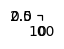

<Figure size 800x200 with 0 Axes>

In [32]:
x = np.linspace(1, 100, 1000)
y = np.log(x)
y1 = np.sin(x)
fig = plt.figure("Line plot", figsize=(0,0))
legendFig = plt.figure("Legend plot")
ax = fig.add_subplot(111)
line4, = ax.plot(x,y, color="C6")
legendFig.legend([line4], 
                 ["DeepBend"], ncol=1)
legendFig.set_figheight(2)
legendFig.set_figwidth(8)
legendFig.savefig('legend.png')

/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/patches.py:742: RuntimeWarning: invalid value encountered in scalar add
  x1 = self.convert_xunits(self._x0 + self._width)
/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/patches.py:743: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)


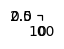

<Figure size 800x200 with 0 Axes>

In [33]:
x = np.linspace(1, 100, 1000)
y = np.log(x)
y1 = np.sin(x)
fig = plt.figure("Line plot", figsize=(0,0))
legendFig = plt.figure("Legend plot")
ax = fig.add_subplot(111)
line5, = ax.plot(x,y, color="C7")
legendFig.legend([line5], 
                 ["MIXBend"], ncol=1)
legendFig.set_figheight(2)
legendFig.set_figwidth(8)
legendFig.savefig('legend.png')

/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/patches.py:742: RuntimeWarning: invalid value encountered in scalar add
  x1 = self.convert_xunits(self._x0 + self._width)
/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/patches.py:743: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)


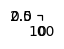

<Figure size 800x200 with 0 Axes>

In [28]:
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["DNAcycP_pred_chrV"][range(starting_point, starting_point + sequence_length)], label="DNAcycP", alpha=0.7, color="C4")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["CycPred_pred_chrV"][range(starting_point, starting_point + sequence_length)], label="CycPred", alpha=0.7, color="C5")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["DeepBend_pred_chrV"][range(starting_point, starting_point + sequence_length)], label="DeepBend", alpha=0.7, color="C6")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["MIXBend_pred_chrV"][range(starting_point, starting_point + sequence_length)], label="MIXBend", alpha=0.7, color="C7")


x = np.linspace(1, 100, 1000)
y = np.log(x)
y1 = np.sin(x)
fig = plt.figure("Line plot", figsize=(0,0))
legendFig = plt.figure("Legend plot")
ax = fig.add_subplot(111)
line1, = ax.plot(x,y, color="C9")
line2, = ax.plot(x,y, color="C4")
line3, = ax.plot(x,y, color="C5")
line4, = ax.plot(x,y, color="C6")
line5, = ax.plot(x,y, color="C7")
# line1, = ax.plot(x, y, c="red", lw=4, linestyle="dashdot")
# line2, = ax.plot(x, y1, c="green", lw=1, linestyle="--")
# legendFig.legend([line1, line4, line2, line5, line3, line6], 
#                  ["C26", "C26 Reverse Complement",
#                   "C29", "C29 Reverse Complement",
#                   "C31", "C31 Reverse Complement"], ncol=3)


legendFig.legend([line1, line2, line3, line4, line5], 
                 ["DNAcycPV2", "DNAcycP", "CycPred", "DeepBend", 
                 "MIXBend"], ncol=1)
legendFig.set_figheight(2)
legendFig.set_figwidth(8)
legendFig.savefig('legend.png')

/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/patches.py:742: RuntimeWarning: invalid value encountered in scalar add
  x1 = self.convert_xunits(self._x0 + self._width)
/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/patches.py:743: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)


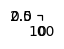

<Figure size 800x200 with 0 Axes>

In [59]:
x = np.linspace(1, 100, 1000)
y = np.log(x)
y1 = np.sin(x)
fig = plt.figure("Line plot", figsize=(0,0))
legendFig = plt.figure("Legend plot")
ax = fig.add_subplot(111)
line1, = ax.plot(x,y, color="C0")
line2, = ax.plot(x,y, color="C1")
line3, = ax.plot(x,y, color="C2")
line4, = ax.plot(x,y, color="C0", linestyle="dashed")
line5, = ax.plot(x,y, color="C1", linestyle="dashed")
line6, = ax.plot(x,y, color="C2", linestyle="dashed")
line7, = ax.plot(x,y, color="C3")
line8, = ax.plot(x,y, color="white")
# line1, = ax.plot(x, y, c="red", lw=4, linestyle="dashdot")
# line2, = ax.plot(x, y1, c="green", lw=1, linestyle="--")
# legendFig.legend([line1, line4, line2, line5, line3, line6], 
#                  ["C26", "C26 Reverse Complement",
#                   "C29", "C29 Reverse Complement",
#                   "C31", "C31 Reverse Complement"], ncol=3)


legendFig.legend([line1, line2, line3, line4, line5, line6, line8, line7], 
                 ["C26", "C29", "C31", "C26 reverse complement", 
                 "C29 reverse complement", "C31 reverse complement", "", "SmoothC0"], ncol=3)
legendFig.set_figheight(2)
legendFig.set_figwidth(8)
legendFig.savefig('legend.png')

In [ ]:
# starting_point = starting_point - (sequence_length*2)

In [ ]:
# # Find Problem Region Type 1: At least one pair of Predicted Cns are not aligned over a period of a given length (one is greater than the other)
# problem_region_type1_parameter = 18
# problem_region_type1_list = []

# C26_C31_reference = (None, -1)
# for i in range(genome_df_chrV.shape[0]):
#     cur_C26_C31_diff_sign = genome_df_chrV.loc[i,"n=26"] < genome_df_chrV.loc[i, "n=31"]

#     # Check if we need to update reference:
#     if C26_C31_reference[0] != cur_C26_C31_diff_sign:
#         # Sign is different, need to update reference
#         # Was it a problem region?
#         if i - C26_C31_reference[1] >= problem_region_type1_parameter:
#             problem_region_type1_list.append((C26_C31_reference[1], i-1))
#         C26_C31_reference = (cur_C26_C31_diff_sign, i)


In [ ]:
# len(problem_region_type1_list)

166

In [ ]:
# total_excluded = 0
# for (l, r) in problem_region_type1_list:
#     total_excluded += r-l+1
# print(total_excluded, total_excluded/genome_df_chrV.shape[0])

5622 0.009746456897672603


In [ ]:
# # Find Problem Region Type 2: SmoothC0 is consistently greater than or consistently less than all Measured Cn values over a period of a given length
# problem_region_type2_parameter = 13
# problem_region_type2_list = []

# type2_reference = (None, -1, -1)
# for i in range(genome_df_chrV.shape[0]):
#     if np.isnan(genome_df_chrV.loc[i,"C26_raw"]):
#         continue

#     cur_C26_diff_sign = genome_df_chrV.loc[i,"smoothC0"] < genome_df_chrV.loc[i, "C26_raw"]
#     cur_C29_diff_sign = genome_df_chrV.loc[i,"smoothC0"] < genome_df_chrV.loc[i, "C29_raw"]
#     cur_C31_diff_sign = genome_df_chrV.loc[i,"smoothC0"] < genome_df_chrV.loc[i, "C31_raw"]

#     # Check if all 3 signs are equal:
#     if (cur_C26_diff_sign == cur_C29_diff_sign) and (cur_C26_diff_sign == cur_C31_diff_sign) and (cur_C29_diff_sign == cur_C31_diff_sign):
#         # All signs are equal, now check how we need to update reference
#         if type2_reference[0] != cur_C26_diff_sign:
#             # Sign is different, need to check if it was a problem region:
#             if type2_reference[2] - type2_reference[1] >= problem_region_type2_parameter:
#                 problem_region_type2_list.append((type2_reference[1], type2_reference[2]))
#             type2_reference = (cur_C26_diff_sign, i, i)
#         else:
#             # Sign is the same, update reference to end of region:
#             type2_reference = (type2_reference[0], type2_reference[1], i)
#     else:
#         # All signs are not equal, update reference:
#         type2_reference = (None, i, i)



In [ ]:
# len(problem_region_type2_list)

30

In [ ]:
# problem_region_type2_list

In [ ]:
# total_excluded = 0
# for (l, r) in problem_region_type2_list:
#     total_excluded += r-l+1
# print(total_excluded, total_excluded/genome_df_chrV.shape[0])

492 0.0008529450006501105


In [ ]:
# Find Problem Region Type 3: At least one of Predicted Cns is not periodic:


In [ ]:
# for (l, r) in problem_region_type1_list:
#     genome_df_chrV.loc[l:r, "smoothC0"] = 0

In [ ]:
# for (l, r) in problem_region_type2_list:
#     genome_df_chrV.loc[l:r, "smoothC0"] = 0

In [ ]:
# for (l, r) in problem_region_type3_list:
#     genome_df_chrV.loc[l:r, "smoothC0"] = 0

In [ ]:
# genome_df_chrV.to_csv(f"/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/ir_lstm_cn_{training_data_name}_{data_name}_smoothC0_adj.csv", index=False)